# Econometria

A econometria se dedica ao estudo das relações entre as variáveis de interessa à análise econômica.

Neste *Notebook* iniciamos o estudo do caso mais simples que é uma relação linear entre duas variáveis. 

Esta relação pode ser estimada pelo método dos mínimos quadrados - MQO (ordinary least squares - OLS). 

Vamos discutir esse método, as condições sob as quais ele funciona bem, e também abordaremos testes para a significância estatística destes modelos e seu uso para fazer previsões.

# Regressão Linear

Na regressão linear, o objetivo é modelar a relação entre uma variável dependente $Y$ e uma ou mais variáveis explicativas denotadas por $X_1, X_2, \cdots, X_n$.

Em uma modelo simples, podemos apresentar a relação entre $Y$ e uma variável explicativa $X$ de uma forma bastante geral como a seguinte:

$$ Y = f(X) + u $$


A função $f$ descreve a relação funcional entre as duas variáveis, e $u$ é um termo de erro estocástico.

Uma abordagem prática, que se adequa para diversas relações, é modelar $f$ como uma função linear. Assim:

$$ Y = \beta_0 + \beta_1 X + u $$ 

Esse tipo de modelo pode ser generalizado para incorporar $p$ variáveis explicativas:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + u $$ 

## O Modelo de regressão linear simples


**Função de regressão populacional (FRP)**
$$ Y_i = \beta_0 + \beta_1 X_1 + u_i $$

em que $u_i \sim N(0, \sigma^2)$.


$Y$ tem uma distribuição condicional dependente do valor de $X$.
$$ Y_i \mid X_i \sim N(\beta_0 + \beta_1 X_i, \sigma^2) $$

Podemos escrever como um valor esperado:

$$ \text{E}[Y_i \mid X_i ] = \beta_0 + \beta_1 X_i $$

$$ \text{Var}[Y_i \mid X_i ] = \sigma^2 $$

A especificação estocástica para a FRP é:

$$ Y_i = \text{E}[Y_i \mid X_i ] + u_i $$

O erro $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos que, por suposição, assumimos ser independente de $X$: $ E (u_i | X_i ) = 0 $.



<img src="pop_reg_line.jpg" width="600"/>


**Função de regressão amostral (FRA)**

Subjacente à FRP, podemos formular o conceito de função de regressão amostral (FRA) para representar a linha de regressão com base nos dados de uma amostra.
Obtemos uma amostra de tamanho $n$ da população, dada por {($X_i$, $Y_i$): i = 1, ..., $n$}.

Com base nos dados amostrais podemos ajustar uma FRA, que em sua versão estocástica é dada por:

$$ Y_i = \hat{\beta}_0 + \hat{\beta}_1 X + \hat{u}_i $$

Nesta expressão $\hat{\beta}_0$ e $\hat{\beta}_1$ são estimativas dos parâmetros $\beta_0$ e $\beta_1$.

Por sua vez, $\hat{u}_i$, denominados como resíduos, são simplesmente as diferenças entre os valores observados e estimados de Y.
$$ \hat{u}_i = Y_i - \hat{Y}_i $$

em que $ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i $.

Um dos métodos mais comumente utilizados para a estimação da FRA é o dos Mínimos Quadrados Ordinários (MQO), o qual tem como objetivo minimizar a soma dos quadrados dos resíduos (S).

$$  \sum_{i=1}^{n} \hat{u}_i^{2} = \sum_{i=1}^{n} (Y_i−\hat{Y}_i)^2 $$

$$  \sum_{i=1}^{n} \hat{u}_i^{2} = \sum_{i=1}^{n} (Y_i - \hat{\beta}_0 + \hat{\beta}_1 X_i)^2 $$






### EXEMPLO: Relação entre duas variáveis.

Vamos simular um conjunto de dados.
Para essa simulação vamos usar a função `random.randn()` da biblioteca *NumPy*. Essa função retorna uma amostra (um array) de uma distribuição normal padrão, que podemos manipular especificando parametros de média e desvio-padrão.

 - 30 pontos amostrais
 - Gerar valores de $X$: com média 100 e desvio-padrão de 36
 - Gerar componente aleatório/ resíduos: com média zero e desvio-padrão de 16
 - A variável Y é dada pela expressão: $ Y = 10 + 0.8 X + u $


In [1]:
# Importar bibliotecas necessárias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Semente aleatória
np.random.seed(0)

# Simular valores do preditor X
X = 36*np.random.randn(40) + 100   # array de 30 valores com média = 100 e desv-pad=36

# Resíduos
res = 16*np.random.randn(40)       # 30 termos de resíduos

# Construir Y com base nos valores de X e dos resíduos
Y = 10 + 0.8 * X + res            # valores de Y

In [10]:
m_X = np.mean(X)
print("Média (X) = ", round(m_X, 2))
m_Y = np.mean(Y)
print("Média (Y) = ", round(m_Y, 2))

Média (X) =  111.25
Média (Y) =  93.02


Vamos plotar a distribuição das duas variáveis X e Y, e dos resíduos.
- Para isso vamos usar a biblioteca **matplotlib**.

Também vamos plotar um diagrama de dispersão para a relação entre X e Y.

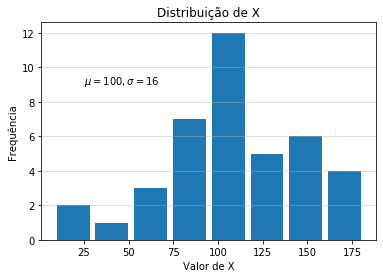

In [28]:
plt.hist(x=X, bins=8, rwidth=0.85)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Valor de X')
plt.ylabel('Frequência')
plt.title('Distribuição de X')
plt.text(25, 9, r'$\mu=100, \sigma=16$')
plt.show()

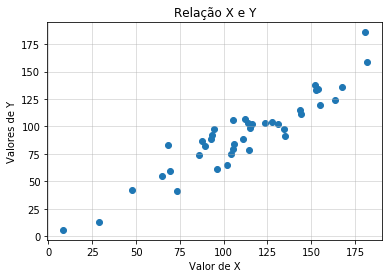

In [32]:
# Diagrama de dispersão
plt.scatter(X, Y, marker='o')
plt.grid(alpha=0.5)
plt.xlabel('Valor de X')
plt.ylabel('Valores de Y')
plt.title('Relação X e Y')
plt.show()

In [9]:
# Criar um Dataframe com X e Y
df = pd.DataFrame({'X': X, 'Y': Y})

# Mostras as primeiras 10 linhas
df.head(10)

,X,Y
0,163.505884,124.027860
1,114.405660,78.804241
2,135.234567,90.887331
3,180.672155,185.750130
4,167.232088,135.631235
5,64.817996,54.845208
6,134.203183,97.317821
7,94.551141,98.080758
8,96.284121,61.204932
9,114.781546,98.421392


## Estimador de Mínimos Quadrados Ordinários (MQO)


Agora iremos tratar da estimação dos parâmetros $\beta_0$ e $\beta_1$.

Dada uma amostra: {($X_i$, $Y_i$): i = 1, ..., $n$}, queremos determinar a FRA de maneira que fique o mais próximo possível do $Y$ observado.

O método de Mínimos Quadrados Ordinários estabelece estimativas dos parâmetros de uma regressão baseada na resolução do seguinte problema:

$$ \underset{\beta_0, \beta_1}{\mathrm{argmin}} \sum_{i = 1}^{n}(Y_i - (\hat{\beta}_0 + \hat{\beta}_1 X_i))^2 $$

Derivadas parciais com relação a $\hat{\beta}_0$ e $\hat{\beta}_1$ com o objetivo de minimizar a soma dos quadrados dos resíduos resultam nas chamadas equações normais:

\begin{aligned}
\sum_{i = 1}^{n}(Y_i - \beta_0 - \beta_1 X_i) &= 0 \\
\sum_{i = 1}^{n}(X_i)(Y_i - \beta_0 - \beta_1 X_i) &= 0 
\end{aligned}


Resolvendo tais equações obtemos:

\begin{aligned}
\hat{\beta}_1 &= \frac{\sum_{i = 1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i = 1}^{n}(X_i - \bar{X})^2} \\
\hat{\beta}_1 &= \frac{\sum_{i = 1}^{n}x_i y_i}{\sum_{i = 1}^{n}x_i^2}
\end{aligned}

e

$$ \hat\beta_0 =  \bar{Y} - \hat\beta_1 \bar{X} $$

Em que:
$$ x_i = X_i - \bar{X} $$

$$ y_i = Y_i - \bar{Y} $$

Perceba que:

$ Cov(y_i, x_i) = \frac{ \sum_{i = 1}^n (x_i)(y_i) }{n} $ e  $ Var(x_i) = \frac{ \sum_{i = 1}^n x_i^2 }{n}$.

Assim, temos uma forma alternativa de obter estimativas para $\beta_1$:

$$ \hat\beta_1 = \frac{ Cov(y_i, x_i) } { Var(x_i) } $$



Dados os valores estimados para os parâmetros podemos calcular estimativas de $Y$:
\begin{align}
  \hat{Y}_i & =  \hat\beta_0 + \hat\beta_1 X_i,\\
  \\
  \hat{u}_i & =  Y_i - \hat{Y}_i. 
\end{align}



### EXEMPLO: Estimação por MQO

Com o conjunto de dados simulados, vamos estimar os parametros com o método de MQO.

In [33]:
# Calcular termos necessários para a estimação dos betas
df['x'] = (df['X'] - m_X)
df['y'] = (df['Y'] - m_Y)
df['xy'] = df['x'] * df['y']
df['x2'] = df['x']**2
# Mostras as primeiras 10 linhas
df.head(10)

,X,Y,x,y,xy,x2
0,163.505884,124.027860,52.254355,31.004670,1620.129023,2730.517660
1,114.405660,78.804241,3.154130,-14.218950,-44.848423,9.948539
2,135.234567,90.887331,23.983038,-2.135860,-51.224405,575.186131
3,180.672155,185.750130,69.420626,92.726940,6437.162227,4819.223333
4,167.232088,135.631235,55.980559,42.608045,2385.222140,3133.822942
5,64.817996,54.845208,-46.433533,-38.177982,1772.738591,2156.072960
6,134.203183,97.317821,22.951654,4.294630,98.568864,526.778421
7,94.551141,98.080758,-16.700389,5.057568,-84.463343,278.902977
8,96.284121,61.204932,-14.967408,-31.818259,476.236856,224.023293
9,114.781546,98.421392,3.530017,5.398202,19.055744,12.461020


In [36]:
# Calculando os betas
b_1 = df['xy'].sum() / df['x2'].sum()
b_0 = m_Y - (b_1 * m_X)

print("Beta_0 = ", round(b_0, 3))
print("Beta_1 = ", round(b_1, 3))

Beta_0 =  -1.041
Beta_1 =  0.846


In [37]:
# Valores preditos de Y
ypred = b_0 + b_1 * X
ypred

array([137.20451078,  95.69002373, 113.3009701 , 151.71867897,
       140.35503431,  53.76340522, 112.42892941,  78.9029281 ,
        80.36817211,  96.00783771,  87.89439049, 127.77540641,
       106.67457021,  87.21353237,  97.02035561,  93.66640577,
       128.98701544,  77.26532184,  93.03917756,  57.51284551,
         5.80160013, 103.4049273 , 109.82183167,  60.91981299,
       152.59716824,  39.24172057,  84.90277223,  77.81243029,
       130.16497734, 128.23457437,  88.22628399,  95.02054541,
        56.48738294,  23.2181248 ,  72.92015323,  88.26894442,
       120.95777661, 120.10822165,  71.72044243,  74.30842036])

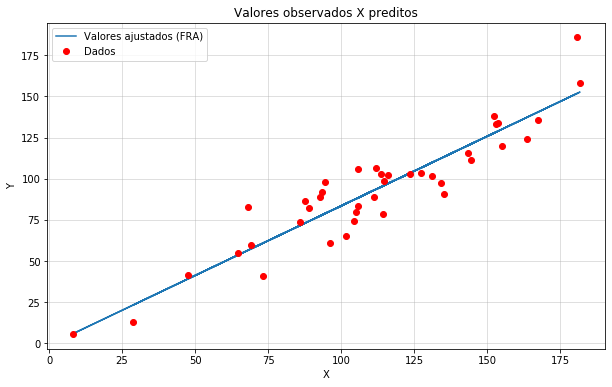

In [39]:
# Gráfico da regressão
plt.figure(figsize=(10, 6))
plt.plot(X, ypred,  label = "Valores ajustados (FRA)")    # linha de regressão
plt.plot(X, Y, 'ro', label = "Dados")                     # pontos de dados
plt.grid(alpha=0.5)
plt.title('Valores observados X preditos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [40]:
df['Yhat'] = b_0 + b_1 * df['X']
df['u'] = df['Y'] - df['Yhat']
df.head(10)

,X,Y,x,y,xy,x2,Yhat,u
0,163.505884,124.027860,52.254355,31.004670,1620.129023,2730.517660,137.204511,-13.176651
1,114.405660,78.804241,3.154130,-14.218950,-44.848423,9.948539,95.690024,-16.885783
2,135.234567,90.887331,23.983038,-2.135860,-51.224405,575.186131,113.300970,-22.413639
3,180.672155,185.750130,69.420626,92.726940,6437.162227,4819.223333,151.718679,34.031451
4,167.232088,135.631235,55.980559,42.608045,2385.222140,3133.822942,140.355034,-4.723799
5,64.817996,54.845208,-46.433533,-38.177982,1772.738591,2156.072960,53.763405,1.081803
6,134.203183,97.317821,22.951654,4.294630,98.568864,526.778421,112.428929,-15.111109
7,94.551141,98.080758,-16.700389,5.057568,-84.463343,278.902977,78.902928,19.177830
8,96.284121,61.204932,-14.967408,-31.818259,476.236856,224.023293,80.368172,-19.163241
9,114.781546,98.421392,3.530017,5.398202,19.055744,12.461020,96.007838,2.413555


## Hipóteses do Método de Mínimos Quadrados Ordinários

-**Hipótese 1**. O modelo de regressão é linear nos parâmetros.

-**Hipótese 2**. Os valores de $X$ são fixos ou independentes do termo de erro.

$$ Cov(X_i, u_i) = 0 $$

-**Hipótese 3**. O valor médio do termo de erro $u_i$ é zero.

$$ E (u_i | X_i ) = 0 $$

-**Hipótese 4**. Homocedasticidade ou variância constante de $u_i$:

$$ Var(u_i)= E (u_i^2 | X_i ) = \sigma^2 $$

-**Hipótese 5**. Não há autocorrelação entre os termos de erro.

$$ Cov(u_i, u_j | X_i, X_j)= 0 $$

-**Hipótese 6**. O número de observações $n$ deve ser maior que o número de parâmetros a serem estimados.

-**Hipótese 7**. Variabilidade dos valores de X.

## Medidas de ajuste

Vamos considerar agora a qualidade do ajustamento da linha de regressão estimada a um conjunto de dados; ou seja, vamos verificar quão “bem” uma linha de regressão amostral é adequada aos dados.

A medida de ajuste mais utilizada é o chamado **coeficiente de determinação** **$R^2$**, que mede o quanto a linha de regressão amostral ajusta-se aos dados.

Considere a expressão:
$$ Y_i = \hat{Y}_i + \hat{u}_i $$

Elevando ao quadrado os dois lados da Equação e somando na amostra temos:

\begin{aligned}
\sum_{i=1}^{n}(Y_i - \bar{Y})^2 &= \sum_{i=1}^{n}(\hat{Y}_i - \bar{Y}_i)^2 + \sum_{i=1}^{n}({Y}_i - \hat{Y}_i)^2 \\
\sum_{i = 1}^n y_i^2 &= \sum_{i = 1}^n \hat{y}_i^2 + \sum_{i=1}^n \hat{u}_i^2
\end{aligned}

Considerando que $ \sum_{i=1}^n \hat{y}_i \cdot \hat{u}_i = 0 $.

A expressão acima permite decompor a variação total em $Y$ em um componente de variação explicada e um de variação não explicada.

- A Soma de Quadrados Total (SQT) representa a variação total dos valores observados de $Y$.
$$ SQT =  \sum_{i = 1}^n y_i^2 $$

- A Soma de Quadrados Explicada (SQT) representa a variação explicada, pelo modelo, dos valores observados de $Y$.
$$ SQE =  \sum_{i = 1}^n \hat{y}_i^2 $$

- A Soma de Quadrados dos Resíduos (SQR) representa a variação não explicada, pelo modelo, dos valores observados de $Y$
$$ SQR = \sum_{i=1}^n \hat{u}_i^2 $$


Nesse sentido a SQT dada por:

$$ SQT = SQE + SQR $$

Dividindo ambos os lados da equação por SQT:

$$ 1 = \frac{SQE}{SQT}+\frac{SQR}{SQT} $$

O coeficiente de determinação é dados pela seguite razão:

$$ R^2 = \frac{SQE}{SQT} $$

ou ainda:

$$ R^2 = 1 - \frac{SQR}{SQT} $$

O valor de $R^2$ assim definido é conhecido como coeficiente de determinação (amostral) e é o indica- dor mais usado para medir a qualidade do ajustamento de uma linha de regressão. Ele a proporção da variação total de $Y$ explicada pelo modelo de regressão.

- Podemos verificar que $ 0 \leq R^2 \leq 1$.


In [44]:
df['u2'] = df['u']**2
df['y2'] = df['y']**2
df['yhat2'] = (df['Yhat']-m_Y)**2

df.head(10)

,X,Y,x,y,xy,x2,Yhat,u,u2,y2,yhat2
0,163.505884,124.027860,52.254355,31.004670,1620.129023,2730.517660,137.204511,-13.176651,173.624122,961.289534,1951.989056
1,114.405660,78.804241,3.154130,-14.218950,-44.848423,9.948539,95.690024,-16.885783,285.129672,202.178538,7.111999
2,135.234567,90.887331,23.983038,-2.135860,-51.224405,575.186131,113.300970,-22.413639,502.371222,4.561897,411.188343
3,180.672155,185.750130,69.420626,92.726940,6437.162227,4819.223333,151.718679,34.031451,1158.139691,8598.285382,3445.160359
4,167.232088,135.631235,55.980559,42.608045,2385.222140,3133.822942,140.355034,-4.723799,22.314278,1815.445468,2240.303432
5,64.817996,54.845208,-46.433533,-38.177982,1772.738591,2156.072960,53.763405,1.081803,1.170298,1457.558335,1541.330746
6,134.203183,97.317821,22.951654,4.294630,98.568864,526.778421,112.428929,-15.111109,228.345607,18.443848,376.582700
7,94.551141,98.080758,-16.700389,5.057568,-84.463343,278.902977,78.902928,19.177830,367.789163,25.578989,199.381812
8,96.284121,61.204932,-14.967408,-31.818259,476.236856,224.023293,80.368172,-19.163241,367.229790,1012.401609,160.149492
9,114.781546,98.421392,3.530017,5.398202,19.055744,12.461020,96.007838,2.413555,5.825246,29.140583,8.908119


In [43]:
SQR = df['u2'].sum()
print("SQR = ", round(SQR, 4))

SQE = df['yhat2'].sum()
print("SQE = ", round(SQE, 4))

SQT = df['y2'].sum()
print("SQT = ", round(SQT, 4))

R2 = SQE/SQT
print("R2 = ", round(R2, 4))

SQR =  6599.39
SQE =  41981.0345
SQT =  48580.4245
R2 =  0.8642


## Valores esperados, variância e erros padrões


$$ \hat{\beta}_1 =  \frac{\sum_{i = 1}^{n}x_iy_i}{\sum_{i = 1}^{n}x_i^2}
\sim N\left(  \beta_1, \ \frac{\sigma^2}{\sum_{i = 1}^{n}x_i^2} \right) $$

$$ \hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X} 
\sim N\left(  \beta_0, \ \frac{\sigma^2 \sum_{i = 1}^{n}X_i^2}{n \sum_{i = 1}^{n}x_i^2} \right) $$

As estimativas dos parâmetros são não-viesadas:
\begin{aligned}
\text{E}[\hat{\beta}_0] &= \beta_0 \\
\text{E}[\hat{\beta}_1] &= \beta_1.
\end{aligned}

E as variâncias são dadas por:
As estimativas dos parâmetros são não-viesadas:
\begin{aligned}
\text{Var}[\hat{\beta}_0] &= \beta_0 \\
\text{Var}[\hat{\beta}_1] &= \beta_1.
\end{aligned}


A variância $\sigma^2$ é estimada com base nos resíduos:

$$ s^2 = \frac{\sum_{i = 1}^n \hat{u}_i^2}{n - 2} $$


Dessa forma, erros padrão das estimativas de MQO podem ser obtidos da seguinte forma:

$$ \text{ep}(\hat{\beta}_1) = \frac{s}{\sqrt{\sum_{i = 1}^{n}x_i^2}} $$

$$ \text{ep}(\hat{\beta}_0) = \frac{s}{\sqrt{n}} \sqrt{\frac{\sum_{i = 1}^{n}X_i^2}{\sum_{i = 1}^{n}x_i^2}} $$


In [45]:
# Calcular termos necessários para a estimação dos betas
df['X2'] = (df['X']**2)
df['Y2'] = (df['Y']**2)

In [46]:
n = df.shape[0]
# variância
s2 = df['u2'].sum()/(n-2)
s = np.sqrt(s2)

In [50]:
ep_b_1 = s/ (np.sqrt(df['x2'].sum()))
print("EP(b_1) = ", round(ep_b_1, 4))

EP(b_1) =  0.0544


In [51]:
ep_b_0 = (s/np.sqrt(n)) * np.sqrt(df['X2'].sum() / df['x2'].sum())
print("EP(b_0) = ", round(ep_b_0, 4))

EP(b_0) =  6.3988


## Intervalos de Confiança e testes de hipóteses no modelo de regressão linear simples


Em vez de tomarmos como base apenas a estimativa pontual, podemos construir intervalos de confiança em torno de um estimador pontual.

Considerando que $\sigma^2$ não é conhecida, mas estimada por $s^2$, a padronização das estimativas dos parâmetros é feita da seguinte forma:

$$ \frac{\hat{\beta}_0 - \beta_0}{\text{ep}(\hat{\beta}_0)} ; \quad \frac{\hat{\beta}_1 - \beta_1}{\text{ep}(\hat{\beta}_1)} $$

Considerando que: 
$$ \frac{\text{SQR}}{\sigma^2} = \frac{(n-2)s^2}{\sigma^2} \sim \chi_{n-2}^2$$.

Temos que:

$$\frac{\hat{\beta}_0 - \beta_0}{\text{ep}(\hat{\beta}_0)} \sim t_{n-2}$$

$$\frac{\hat{\beta}_1 - \beta_1}{\text{ep}(\hat{\beta}_1)} \sim t_{n-2}$$


Dessa forma, podemos estimar intervalos de confiança de $100(1 - \alpha)%$ para as estimativas de $\hat\beta$ da seguinte forma:

$$ \hat{\beta}_0 \pm t_{\alpha/2, n - 2} \cdot \text{ep}(\hat{\beta}_0) $$

$$ \hat{\beta}_1 \pm t_{\alpha/2, n - 2} \cdot \text{ep}(\hat{\beta}_1) $$

#### Teste de hipóteses

Formulando hipóteses comuns em um modelo de regressão linear simples:

$$H_{0}:\beta_{1}=0,  \; \; \; \;  H_{1}:\beta_{1} \neq 0$$


Uma abordagem para o teste de hipotese considera a estimativa de intervalo de confiança, visto anteriormente. Neste caso, estabelecemos um intervalo de confiança de $100(1 - \alpha)%$ para $\hat\beta$. 

Se $\beta$ sob $H_0$, $\beta_{H_0}$, situar-se no intervalo de confiança, não rejeitamos $H_0$, mas, se o valor de $\beta_{H_0}$ se situar fora do intervalo estimado, rejeitamos $H_0$.

Outra abordagem alternativa é a do teste de teste de significância. Um teste de significância é um procedimento em que os resultados amostrais são usados para verificar a veracidade ou a falsidade de uma hipótese nula. A ideia fundamental por trás dos testes de significância é a de uma estatística de teste e a distribuição amostral dessa estatística sob a hipótese nula.

De forma geral, a estatística de teste é dada pela regra:
$$ t = \frac{\text{valor estimado} - \text{valor hipotetizado}}{\text{erro padrão do estimador}} $$

A decisão de aceitar ou rejeitar H0 é tomada com base no valor do teste estatístico dos dados disponíveis.

No caso de um teste de hipótese para avaliar a significância estatística de $\hat{\beta}_1$, a estatística de teste é dada por:

$$t_{\beta_{1}} = \frac{\hat{\beta}_1 - \beta_1^{H_0}}{\text{ep}(\hat{\beta}_1)} \sim t_{(n-2)}$$






### O *valor-p*

O calcanhar de Aquiles do teste de hipóteses é a arbitrariedade na seleção de $\alpha$.

O *valor-p*, também conhecido como nível de significância exato ou probabilidade exata de cometer um erro do Tipo I, define o menor nível de significância em que uma hipótese nula pode ser rejeitada. Nesse caso, para um *valor-p* extremamente baixo, rejeitamos a hipótese nula dado qualquer nível de $\alpha$.

**Statsmodels**

Para estimar modelos de regressão linear vamos utilizar o [Statsmodels](https://www.statsmodels.org/stable/regression.html).

Statsmodels é um módulo Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração de dados. 

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [53]:
X = sm.add_constant(X)

# Define o modelo
modelo = sm.OLS(Y, X)
# Estima dos resultados
resultados = modelo.fit()
# Imprime os resultados
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     241.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           4.65e-18
Time:                        18:24:27   Log-Likelihood:                -158.87
No. Observations:                  40   AIC:                             321.7
Df Residuals:                      38   BIC:                             325.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0405      6.399     -0.163      0.8

### EXEMPLO: Valor do aluguel de imóveis no Brasil

Conjunto de dados disponível no [Kaggle](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv).

Aqui apliquei algumas mudanças nos nomes de colunas.

In [56]:
# Caso esteja utilizando o Google Colab execute as duas linhas à seguir
#from google.colab import files
#uploaded = files.upload()

df = pd.read_csv("dados/aluguel_imoveis.csv")
df.head()

,cidade,area,quartos,banheiros,garagem,andar,pets,mobilia,tx_condiminio,valor_aluguel,iptu,seguro,valor_total
0,São Paulo,70,2,1,1,7,aceita,sim,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,aceita,nao,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,aceita,nao,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,aceita,nao,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,nao aceita,nao,0,800,25,11,836


In [57]:
y = df['valor_aluguel']
X = df['area']

In [58]:
# Adicionando uma constante (1's) em X 
X = sm.add_constant(X)

In [59]:
# Define o modelo
modelo = sm.OLS(y, X)
# Estima dos resultados
resultados = modelo.fit()
# Imprime os resultados
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     361.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           3.40e-79
Time:                        18:26:49   Log-Likelihood:            -1.0196e+05
No. Observations:               10692   AIC:                         2.039e+05
Df Residuals:                   10690   BIC:                         2.039e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3725.0637     33.651    110.697      0.0

Desde a versão 0.5.0, `statsmodels` permite aos usuários ajustar modelos estatísticos usando fórmulas ao estilo do R.

Uma vantagem é poder fazer isso diretamente, declarando variáveis do Dataframe.

In [60]:
import statsmodels.formula.api as smf

In [61]:
modelof = smf.ols(formula='valor_aluguel ~ area', data=df).fit()
print(modelof.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     361.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           3.40e-79
Time:                        18:26:55   Log-Likelihood:            -1.0196e+05
No. Observations:               10692   AIC:                         2.039e+05
Df Residuals:                   10690   BIC:                         2.039e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3725.0637     33.651    110.697      0.0